<a href="https://colab.research.google.com/github/nish109/real_estate_analysis/blob/main/Croydon_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [ ]:
drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Github/

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/scripts/Property data/hpm_la/Croydon_link_01042021.csv')
#data from https://data.london.gov.uk/publisher/ucl
df.head(2)

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,tfarea,numberrooms,classt,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND
0,1787.500000,2002,2002-07-24,S,F,143000.0,CR0 0AA,E09000008,{9E6E3054-F623-40D8-98A2-79DB520B63A7},16658655,80.0,4.0,11,61,78,England and Wales: 1950-1966
1,4174.757282,2017,2017-08-09,T,F,430000.0,CR0 0AA,E09000008,{582D0637-7278-8F22-E053-6C04A8C01BAC},16617055,103.0,6.0,11,74,85,England and Wales: 1967-1975


## Shape of the data

In [ ]:
df['dateoftransfer'] = pd.to_datetime(df['dateoftransfer'])  #change the date of transfer to date type
df.rename({'priceper': 'price/sqm', 'duration': 'tenure', 'tfarea': 'floor_area', 'numberrooms': 'rooms', 'CURRENT_ENERGY_EFFICIENCY': 'current_epc', 'POTENTIAL_ENERGY_EFFICIENCY': 'potential_epc', 'CONSTRUCTION_AGE_BAND': 'contruction_age_band'}, axis=1, inplace = True)  # new method
df.info()

#tenure - freehold or leasehold
#property_type - D = Detached, S = Semi-detached, T = Terraced, F = Flats/maisonettes
#floor_area in sqm 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105488 entries, 0 to 105487
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   price/sqm             105477 non-null  float64       
 1   year                  105488 non-null  int64         
 2   dateoftransfer        105488 non-null  datetime64[ns]
 3   propertytype          105488 non-null  object        
 4   tenure                105488 non-null  object        
 5   price                 105488 non-null  float64       
 6   postcode              105488 non-null  object        
 7   lad21cd               105488 non-null  object        
 8   transactionid         105488 non-null  object        
 9   id                    105488 non-null  int64         
 10  floor_area            105488 non-null  float64       
 11  rooms                 99109 non-null   float64       
 12  classt                105488 non-null  int64         
 13 

In [ ]:
df.describe()
#seem to be properties where the number of rooms are 90 and price/sqm of 121323 which are much higher than the 75% percentile - very odd, let's investigate

,price/sqm,year,price,id,floor_area,rooms,classt,current_epc,potential_epc
count,105477.000000,105488.000000,1.054880e+05,1.054880e+05,105488.000000,99109.000000,105488.000000,105488.000000,105488.000000
mean,2864.645003,2007.610809,2.349414e+05,1.665580e+07,84.137002,4.104279,11.244179,60.887637,75.214508
std,1611.552044,7.410180,1.681706e+05,4.390908e+05,42.217208,1.750009,0.429602,12.999812,10.677863
min,9.196812,1995.000000,6.000000e+02,1.042304e+07,0.000000,1.000000,11.000000,1.000000,1.000000
25%,1686.746988,2001.000000,1.210000e+05,1.664364e+07,58.000000,3.000000,11.000000,54.000000,70.000000
50%,2694.915254,2007.000000,1.980000e+05,1.667497e+07,76.000000,4.000000,11.000000,62.000000,78.000000
75%,3803.418803,2014.000000,3.060000e+05,1.670629e+07,98.700000,5.000000,11.000000,69.000000,83.000000
max,121323.529412,2021.000000,4.225000e+06,1.860456e+07,1053.000000,90.000000,12.000000,96.000000,126.000000


In [ ]:
#sns.heatmap(df)

In [ ]:
px.histogram(df, x='price/sqm')
#there are a few property ranging in £10,000 - £120,000 /sqm - could this be an error? 

In [ ]:
df.loc[df['price/sqm'] >= 10000]

,price/sqm,year,dateoftransfer,propertytype,tenure,price,postcode,lad21cd,transactionid,id,floor_area,rooms,classt,current_epc,potential_epc,contruction_age_band
2749,10263.157895,2000,2000-06-02,S,F,195000.0,CR0 1BG,E09000008,{62E785E1-EF31-4FD5-8AF9-20DEC8DC8D44},16674034,19.00,1.0,11,67,71,England and Wales: before 1900
2752,17105.263158,2004,2004-04-23,S,F,325000.0,CR0 1BG,E09000008,{777FD64A-FEEA-4CB2-80E8-3B37C095ABCA},16674034,19.00,1.0,11,67,71,England and Wales: before 1900
2755,11407.300672,2007,2007-01-03,T,F,475000.0,CR0 1BG,E09000008,{B88FC1F2-87E4-4B5F-B92F-87D8F4896E30},16701180,41.64,3.0,11,57,58,England and Wales: before 1900
3092,10962.988949,2014,2014-12-19,T,F,625000.0,CR0 1DP,E09000008,{6478E14F-33CE-4F1F-B6D6-3F8F9FF4C307},16725109,57.01,3.0,12,70,70,England and Wales: 1900-1929
3601,13470.833333,2016,2016-05-05,F,L,484950.0,CR0 1FQ,E09000008,{50F18103-77F0-9FD5-E050-A8C063054923},16724232,36.00,NaN,11,65,65,NO DATA!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103223,12113.617377,2004,2004-09-22,F,L,145000.0,SW16 4DP,E09000008,{66B9D7A6-E29F-48D2-9B44-13CA7D682E64},16690383,11.97,2.0,12,60,73,England and Wales: 1950-1966
103443,13541.666667,2003,2003-12-18,F,L,975000.0,SW16 4EH,E09000008,{C395CEB2-C114-48FE-B339-9A8F390D9C54},16722578,72.00,3.0,11,71,78,England and Wales: 1991-1995
103926,16115.702479,2007,2007-04-12,F,L,195000.0,SW16 4LD,E09000008,{F5571FC1-6BEC-426E-9A73-F533847D074E},16654465,12.10,4.0,12,66,81,England and Wales: 1950-1966
103927,16528.925620,2011,2011-09-16,F,L,200000.0,SW16 4LD,E09000008,{269B1BD1-D782-4DFE-8143-04A7FD8D30A2},16654465,12.10,4.0,12,66,81,England and Wales: 1950-1966


In [ ]:
px.histogram(df, x='rooms')


In [ ]:
#There are clearly some outliers in the rooms and price/sqm field 
#let's create some thressholds to remove any outliers
#there may be some outliers due to the property being a car spark space (thus a high price/sqm)
#or because the properties are hotels, office buildings (hence high number of room)
#or the numbers may have simply been entered incorrectly

#Outliers are usually Lower range limit = Q1 – (1.5* IQR) or Higher range limit = Q3 + (1.5*IQR) 

In [ ]:
room_outliers = df[df['rooms']>]

In [ ]:
#extract outliers by price/sqm 
def outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outlier = outliers(df[['price/sqm']]).dropna() #extract all outlier values in the price/sqm field
#sns.heatmap(outliers(df[['price/sqm']]).isnull())
outlier_pps  = df[df.index.isin(outlier.index)] #get all related data to the outliers

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



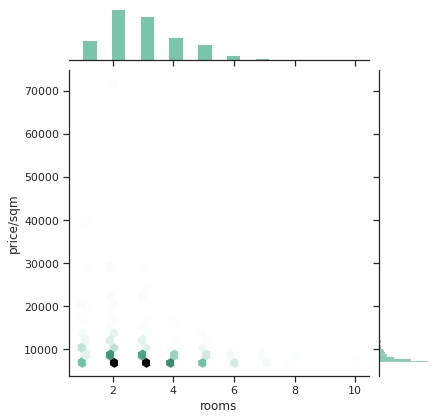

In [ ]:
outlier_pps.dropna(inplace= True)
sns.set_theme(style="ticks")
sns.jointplot(x=outlier_pps['rooms'], y=outlier_pps['price/sqm'], kind="hex", color="#4CB391")
#plotting the data where the price/sqm field is an outlier, we can see that the number of rooms are limited to less than - and no to the 90 rooms we've seem some data points have. 
#The data points where price/sqm is an outlier could be becuase they are luxury properties or in high value postcodes(and not hotels or offices which likely have a larger number of rooms). 


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



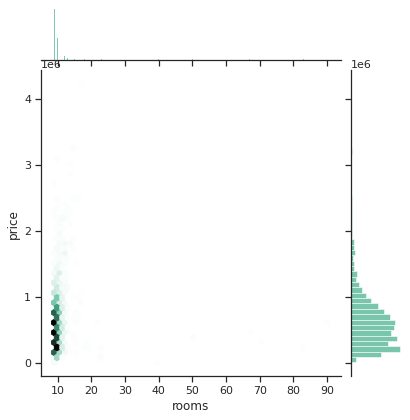

In [ ]:
#now lets extract outliers in the 'rooms' field
def outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outlier = outliers(df[['rooms']]).dropna() #extract all outlier values in the price/sqm field
outlier_rooms = df[df.index.isin(outlier.index)] #get all related data to the outliers

outlier_rooms.dropna(inplace= True)
sns.set_theme(style="ticks")
sns.jointplot(x=outlier_rooms['rooms'], y=outlier_rooms['price'], kind="hex", color="#4CB391")

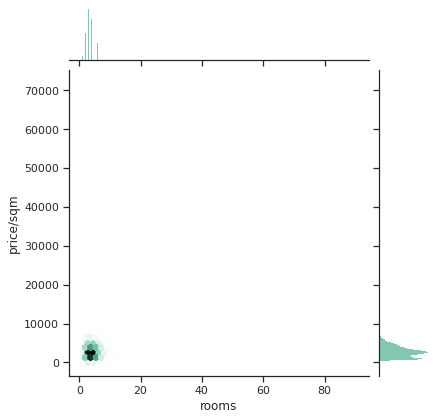

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
sns.jointplot(x=df['rooms'], y=df['price/sqm'], kind="hex", color="#4CB391")

In [ ]:
df['postcode'][1].split("/s")
df

,price/sqm,year,dateoftransfer,propertytype,tenure,price,postcode,lad21cd,transactionid,id,floor_area,rooms,classt,current_epc,potential_epc,contruction_age_band,area
0,1787.500000,2002,2002-07-24,S,F,143000.0,CR0 0AA,E09000008,{9E6E3054-F623-40D8-98A2-79DB520B63A7},16658655,80.00,4.0,11,61,78,England and Wales: 1950-1966,[CR0 0AA]
1,4174.757282,2017,2017-08-09,T,F,430000.0,CR0 0AA,E09000008,{582D0637-7278-8F22-E053-6C04A8C01BAC},16617055,103.00,6.0,11,74,85,England and Wales: 1967-1975,[CR0 0AA]
2,1852.047836,2010,2010-03-10,T,F,175000.0,CR0 0AA,E09000008,{00535E88-443D-4589-A295-959C3ECF2C20},16679217,94.49,3.0,12,53,66,England and Wales: 1950-1966,[CR0 0AA]
3,2315.533981,2007,2007-09-07,T,F,238500.0,CR0 0AA,E09000008,{1AD45476-B785-44B0-BDB6-B80F19058019},16617055,103.00,6.0,11,74,85,England and Wales: 1967-1975,[CR0 0AA]
4,2155.963303,2007,2007-06-11,T,F,235000.0,CR0 0AA,E09000008,{F737CDCF-1B11-4FA0-818D-7EF4C34B35D7},16615857,109.00,6.0,11,69,84,England and Wales: 1950-1966,[CR0 0AA]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105483,NaN,2009,2009-10-16,F,L,280000.0,CR0 7EX,E09000008,{7DE690C5-DCD8-4C0E-AC7D-2E4C06F81DB3},16653339,0.00,NaN,11,83,85,NO DATA!,[CR0 7EX]
105484,NaN,2015,2015-11-30,F,L,275000.0,CR0 7EX,E09000008,{2AC10E4F-F7A1-1AF6-E050-A8C063052BA1},16633762,0.00,NaN,11,76,77,NO DATA!,[CR0 7EX]
105485,NaN,2012,2012-04-05,F,L,175000.0,SE19 3AY,E09000008,{F0722BAB-DA5D-412C-844E-C8DBBD7E1393},16720166,0.00,NaN,11,84,85,NO DATA!,[SE19 3AY]
105486,NaN,2010,2010-08-24,F,L,125000.0,SW16 4JS,E09000008,{349B26EA-3CB7-4A97-A197-378B95677EA8},16717147,0.00,3.0,11,81,81,England and Wales: 1900-1929,[SW16 4JS]


In [ ]:
df

,price/sqm,year,dateoftransfer,propertytype,tenure,price,postcode,lad21cd,transactionid,id,floor_area,rooms,classt,current_epc,potential_epc,contruction_age_band,area
0,1787.500000,2002,2002-07-24,S,F,143000.0,CR0 0AA,E09000008,{9E6E3054-F623-40D8-98A2-79DB520B63A7},16658655,80.00,4.0,11,61,78,England and Wales: 1950-1966,[CR0 0AA]
1,4174.757282,2017,2017-08-09,T,F,430000.0,CR0 0AA,E09000008,{582D0637-7278-8F22-E053-6C04A8C01BAC},16617055,103.00,6.0,11,74,85,England and Wales: 1967-1975,[CR0 0AA]
2,1852.047836,2010,2010-03-10,T,F,175000.0,CR0 0AA,E09000008,{00535E88-443D-4589-A295-959C3ECF2C20},16679217,94.49,3.0,12,53,66,England and Wales: 1950-1966,[CR0 0AA]
3,2315.533981,2007,2007-09-07,T,F,238500.0,CR0 0AA,E09000008,{1AD45476-B785-44B0-BDB6-B80F19058019},16617055,103.00,6.0,11,74,85,England and Wales: 1967-1975,[CR0 0AA]
4,2155.963303,2007,2007-06-11,T,F,235000.0,CR0 0AA,E09000008,{F737CDCF-1B11-4FA0-818D-7EF4C34B35D7},16615857,109.00,6.0,11,69,84,England and Wales: 1950-1966,[CR0 0AA]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105483,NaN,2009,2009-10-16,F,L,280000.0,CR0 7EX,E09000008,{7DE690C5-DCD8-4C0E-AC7D-2E4C06F81DB3},16653339,0.00,NaN,11,83,85,NO DATA!,[CR0 7EX]
105484,NaN,2015,2015-11-30,F,L,275000.0,CR0 7EX,E09000008,{2AC10E4F-F7A1-1AF6-E050-A8C063052BA1},16633762,0.00,NaN,11,76,77,NO DATA!,[CR0 7EX]
105485,NaN,2012,2012-04-05,F,L,175000.0,SE19 3AY,E09000008,{F0722BAB-DA5D-412C-844E-C8DBBD7E1393},16720166,0.00,NaN,11,84,85,NO DATA!,[SE19 3AY]
105486,NaN,2010,2010-08-24,F,L,125000.0,SW16 4JS,E09000008,{349B26EA-3CB7-4A97-A197-378B95677EA8},16717147,0.00,3.0,11,81,81,England and Wales: 1900-1929,[SW16 4JS]


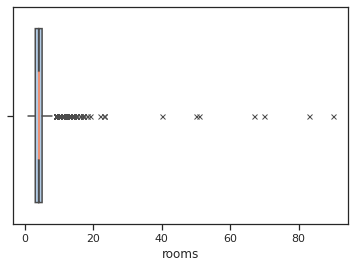

In [ ]:
sns.boxplot(
    data=df, x="rooms",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



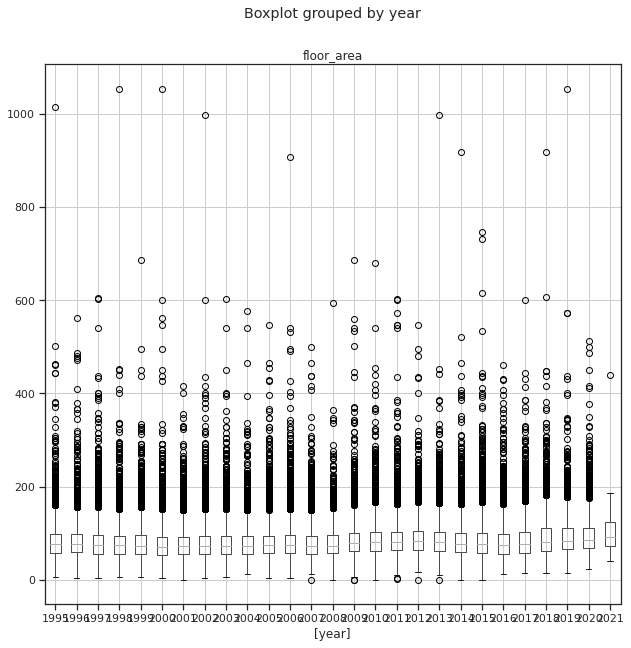

In [ ]:
Q1 = df['floor_area'].quantile(0.25)
Q3 = df['floor_area'].quantile(0.75)
IQR = Q3 - Q1
df.boxplot(by = ['year'], column =['floor_area'], figsize=(10,10))#.axhline(y=(Q3 + (1.5*IQR)), color= 'green', linewidth=2,)

In [ ]:
#lets extract all the rows of the data frame that contian floor_area, number of rooms and price/sqm outliers
#the IQR for each year will be different,
df[df['floor_area']>(Q3 + (1.5*IQR))]

,price/sqm,year,dateoftransfer,propertytype,tenure,price,postcode,lad21cd,transactionid,id,floor_area,rooms,classt,current_epc,potential_epc,contruction_age_band
76,1093.750000,2003,2003-07-07,T,F,210000.0,CR0 0AG,E09000008,{FB44E372-A44B-4CE9-84FA-450C16D6B155},16632360,192.00,7.0,11,59,84,England and Wales: 1950-1966
918,1166.813251,2004,2004-01-16,T,F,199000.0,CR0 0HU,E09000008,{808548B7-5887-4A6F-B63F-7F825A94AD0E},16632337,170.55,9.0,12,63,76,England and Wales: 1950-1966
920,1700.381120,2010,2010-09-30,S,F,290000.0,CR0 0HU,E09000008,{9B780DA0-1898-4CFB-89D9-561B1108E415},16632337,170.55,9.0,12,63,76,England and Wales: 1950-1966
1622,486.923077,2000,2000-05-25,S,L,94950.0,CR0 0PF,E09000008,{B7B3DD38-69BC-477D-9DC6-D3334B446A89},16705084,195.00,5.0,12,72,86,England and Wales: 1930-1949
1624,305.128205,1998,1998-06-30,S,L,59500.0,CR0 0PF,E09000008,{9DFE6DAB-F372-41BF-9F74-52522A8E611B},16705084,195.00,5.0,12,72,86,England and Wales: 1930-1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105177,954.938824,2001,2001-10-15,S,F,160000.0,SW16 4UU,E09000008,{BC3EBD23-FAA7-4E87-A241-400C51F4448E},16620044,167.55,8.0,11,28,36,England and Wales: 1900-1929
105205,1226.993865,1999,1999-08-20,D,F,200000.0,SW16 4UX,E09000008,{25A41AE8-964A-48D3-9EE0-CFA6F92E0A10},16719641,163.00,6.0,11,52,79,England and Wales: 1930-1949
105208,3521.212121,2014,2014-11-06,S,F,581000.0,SW16 4UX,E09000008,{004DD511-F15D-4AE4-A11E-E9489C193514},16675831,165.00,6.0,11,61,83,England and Wales: before 1900
105324,567.751479,1996,1996-11-08,S,F,95950.0,SW16 5QN,E09000008,{3E0B4EEA-17A7-45AB-8ED5-29EC09C4F9FB},16653697,169.00,7.0,11,58,75,England and Wales: 1930-1949


# New Section